# K-nearest neighbors

There are many classification algorithms we could use for this problem. But let's experiment with K-nearest neighbors (KNN) classification. KNN is a popular approach because it's algorithmically simple and often performs quite well. The core idea is that, for every observation in our test set (i.e., the dataset we want to make predictions for), we identify the $k$ nearest neighbors in the training set (i.e., the set of training observations that are most similar to the target observation in terms of their features), and then assign the class that's most common in that neighborhood. By varying $k$—the size of the neighborhood—we can control the sensitivity of the classifier to local conditions. A small value will yield a highly variable classification that can capture fine-grained variation; a large value will yield smoothly varying boundaries that primarily capture coarse information.

Here's a schematic illustration:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1920px-KnnClassification.svg.png" alt="KNN" width="600"/>

Let's apply a KNN classifier to our age prediction problem using scikit-learn. First, we pull out the `X` and `y` data from our larger `DataFrame`.

In [15]:
# Set up our X and y variables
X = sample[['Conscientiousness', 'Extraversion']].values
y = sample['age_group'].values

Now we initialize a `KNeighborsClassifier` and fit it to the data. The `fit`/`predict` procedure looks just like it did for regression problems. Note the key parameter `n_neighbors` (i.e., $k$), which we can experiment with.

In [16]:
# neighborhood size: experiment with this!
N_NEIGHBORS = 5

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, weights='uniform')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Let's plot the decision boundaries and see what the classifier is doing...

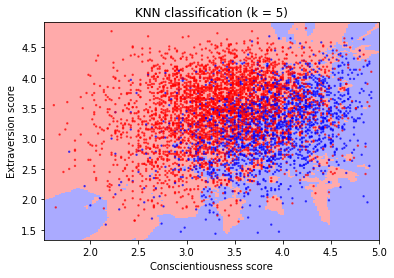

In [17]:
# Plot adapted from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib.colors import ListedColormap

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=2, alpha=0.6)
plt.xlabel("Conscientiousness score")
plt.ylabel("Extraversion score")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN classification (k = %i)" % N_NEIGHBORS);

# How well did we do?

It seems pretty clear from the above plot that performance is reasonably good—i.e., most of the observations are being assigned to the right class. But let's quantify that. As a first pass, we can just look at mean accuracy.

In [18]:
# Score performance using mean accuracy (i.e., proportion correct)
knn.score(X, y)

0.8033240997229917

This seems pretty decent, but overall accuracy can mask some important nuances. We can get some more information using the `classification_report` utility.

In [19]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      3877
         1.0       0.73      0.65      0.68      1899

    accuracy                           0.80      5776
   macro avg       0.78      0.76      0.77      5776
weighted avg       0.80      0.80      0.80      5776



The [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is also often helpful:

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X)

cm = confusion_matrix(y, y_pred)

pd.DataFrame(cm, columns=["YOUNG (pred.)", "OLD (pred.)"], index=["YOUNG (true)", "OLD (true)"])

YOUNG (pred.)  OLD (pred.)
YOUNG (true)           3414          463
OLD (true)              673         1226